START NOTEBOOK

# Model Description

A dissipation model was developed at the microcosm scale to estimate pesticide component dissipation in top-soil, i.e. degradation and leaching during infiltration. Partitioning between rainfall and runoff was determined using the Green-Ampt method (Green and Ampt, 1911; Mein and Larson, 1973). This simplification of the Richards equation (Richards, 1931) simulates overland flow when rainfall intensity overcomes the soil infiltration capacity. The retention and release of pesticide components in the top-soil was conceptualized using a mixing layer model (McGrath et al., 2008; Joyce et al., 2010). This approach assumes linear equilibrium sorption and adapts McGrath et al. (2008) by directly accounting for the leached volume such that:

$$ C(t+t_r) = C(t) \cdot exp\big( \frac{-V_{lch}}{ R~V_{H_2O} } \big) $$

$$ V_{lch} = h_{lch} \pi r^2 $$

$$ V_{H_2O} = \pi \cdot r^2 \cdot zl \cdot \theta_{sat} $$

$$ R = 1 + \frac{\rho_b K_d}{\theta_{sat}} $$

where $C$ is the concentration before $(t)$ and after $(t+ t_r)$ the leaching event, $(h_{lch})~[cm]$ is leached depth, $r~[cm]$ is the microcosm radius, $zl ~[cm]$ is the soil height and $\theta_{sat} ~ [cm^3 cm^{-3}]$ the constant volumetric water content (saturated capacity).



## Set-up 

In [43]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Rainfal intensities

In [2]:
intensities = [2.25, 0.92, 0.5]  # mm/min = [0.225, 0.092, 0.05] cm/min

### Microcosm

In [3]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height = 27  # Mixing layer depth in mm

### Soil - Hydrological Characteristics

In [4]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop = 2.24  # mm/min (13.45 cm/h - Crop Soil)
kSat_crop2 = kSat_crop/100 
ov_1 = 0.20   # Initial water content m3. m-3
ovSat_crop = 0.58  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck (mm)
psi_crop2 = 617.0  # soil suction Alteck (mm)
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height1= 20  # mm

# Results

## Hydrology - 1st pulse

In [5]:
water_data = leachsim(ovSat=ovSat_crop,
                      kSat=kSat_crop,
                      ov = ov_1,
                      psi=psi_crop,
                      soil_height=soil_height1)

# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmh = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_55mmh, time_size_30mmh]

""" Observed Hydrlogy Annual Crop """
# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  


Mass balance 0.0
Mass balance 0.0
Mass balance 0.0


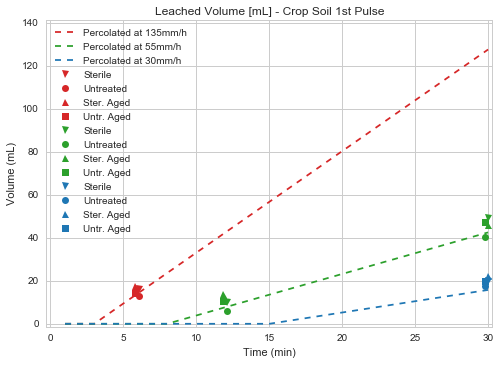

In [6]:
hydroplot(percol_data1, 
          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
          "Leached Volume [mL] - Crop Soil 1st Pulse")

## Transport - 1st pulse

### Soil - Transport Charachteristics

In [7]:
# Soil characteristics
pb_crop = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3
porosity_crop = 0.61  # Crop soil

# Assumed (used to calculate Reynolds number)
runoff_vel = 20.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley - Scenario 2)
foc_crop_untreat2 = 2.04/100
foc_crop_sterile2 = 0.70*foc_crop_untreat2

### Metalaxyl Properties

In [8]:
# Pesticide Koc 
Koc_mexyl = [163.0, 100, 80.0, 50, 30]  # [(a) , (b), (c)] [ml/g] 
Koc_mexyl = np.array(Koc_mexyl)*10**3  # [mm3/g]

# Kd (a) - NPIC @ http://npic.orst.edu/ingred/ppdmove.htm
Kd_mexylA_crop_sterile = Koc_mexyl[0]*foc_crop_sterile  
Kd_mexylA_crop_untreat = Koc_mexyl[0]*foc_crop_untreat

# Kd (b) - PAN @ http://www.pesticideinfo.org/
Kd_mexylB_crop_sterile = Koc_mexyl[1]*foc_crop_sterile  
Kd_mexylB_crop_untreat = Koc_mexyl[1]*foc_crop_untreat

# Kd (c) - https://toxnet.nlm.nih.gov/cgi-bin/sis/search/a?dbs+hsdb:@term+@DOCNO+7061
Kd_mexylC_crop_sterile = Koc_mexyl[2]*foc_crop_sterile  
Kd_mexylC_crop_untreat = Koc_mexyl[2]*foc_crop_untreat

Kd_mexyl = [Kd_mexylA_crop_sterile, Kd_mexylA_crop_untreat, 
            Kd_mexylB_crop_sterile, Kd_mexylB_crop_untreat,
            Kd_mexylC_crop_sterile, Kd_mexylC_crop_untreat]

In [9]:
kdmx_array = np.asarray(Kd_mexyl)
np.log10(kdmx_array)

array([ 3.56332656,  3.7167672 ,  3.35113896,  3.50457959,  3.25422895,
        3.40766958])

#### Initial mass

In [10]:
# Initial contaminant mass in samples
mx_ini_sterile = (1818.1+1472.7) / float(2)  
mx_ini_untreated = (1518.1+1413.3) / float(2)  

mx_ini1 = [mx_ini_sterile, mx_ini_untreated]

#### Mass observed

In [11]:
# Observed Metalaxyl Output - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop = np.array([(138.1+207.1)/2.0,
                                (201.0+50.4)/2.0, (641.8+356.8)/2.0,
                                (177.0+293.5)/2.0])  
mx_obs_untreat_crop = np.array([(145.4+283.5)/2.0,
                                (158.4+262.3)/2.0, (674.9+360.2)/2.0,
                                (418.2+480.9)/2.0])

mx_sol_leach1 = [mx_obs_sterile_crop, mx_obs_untreat_crop]

# No ponding (no mass) observed in first pulse
mx_obs_sterile_crop_roff = np.array([ 0., 0., 0., 0.])  
mx_obs_sterile_crop_roff = np.array([ 0., 0., 0., 0.])

mx_sol_pond1 = [mx_obs_sterile_crop_roff, mx_obs_sterile_crop_roff]

In [12]:
# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
leach1_high_6min = np.array([138.1, 145.4, 207.1, 283.5])  

# all at 12 min, med intensity
leach1_med_12min = np.array([201.0, 158.4, 50.4, 262.3]) 

# all at 30min, med intensity
leach1_med_30min = np.array([641.8, 674.9, 356.8, 360.2])  

# all at 30min, low intensity
leach1_low_30min = np.array([177.0, 418.2, 293.5, 480.9])  

# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff1_high_6min = np.array([0., 0., 0., 0.])  

# all at 12 min, med intensity
roff1_med_12min = np.array([0., 0., 0., 0.]) 

# all at 30min, med intensity
roff1_med_30min = np.array([0., 0., 0., 0.])  

# all at 30min, low intensity
roff1_low_30min = np.array([0., 0., 0., 0.])  

### Computation transport - 1st pulse

### Sterile Simulations Results

In [13]:

Kd_mexyl_sterile = [Kd_mexylB_crop_sterile]

"""
Kd_mexyl = [Kd_mexylA_crop_sterile, Kd_mexylA_crop_untreat, 
            Kd_mexylB_crop_sterile, Kd_mexylB_crop_untreat,
            Kd_mexylC_crop_sterile, Kd_mexylC_crop_untreat]


# Any length unit input must be: "mm"
cum_mx_crop = pest_test(Kd_mexyl_sterile,
                        intensities,
                        pb_crop,
                        ovSat_crop,
                        percol_data1, runoff_data1, infil_data1, time_sizes1,
                        area, soil_height, 
                        mx_ini1,
                        mx_sol_leach1, mx_sol_pond1,
                        d, runoff_vel,
                        KFILM=True)
"""

Best log Kd (sterile):  3.3511389585818487 ( Num:  1 ) 
 Error:  0.295982129149
Best log Kd (untreat):  3.3511389585818487 ( Num:  1 ) 
 Error:  0.564252713029


In [ ]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)
mx_dict_S_1st = {
    'high_0d': (1818.12, 8.35, 'nan'),
    'high_1d': ( 'nan'),
    'med12_0d': (1818.12, 290.3, 'nan'),
    'med12_1d': (, 'nan'),
    'med30_0d': (1818.12, 93.3, 'nan'),
    'med30_1d': ( 'nan'),
    'low_0d': (1818.12, 285.3, 'nan'),
    'low_1d': (, 'nan')
}

#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)
mx_dict_L_1st = {
    'high_0d': (1222.86, 175.44, 4.7),
    'high_1d': (1006.54, 40.03, 3.2),
    'med12_0d': (1211.28, 272.5, 1.8),
    'med12_1d': (1025.43, 168.5, 'nan'),
    'med30_0d': (751.13, 35.1, 8.9),
    'med30_1d': (938.23, 146.1, 0.1),
    'low_0d': (979.82, 86.0, 5.8),
    'low_1d': (830.68, 76.5, 9.6)
}

In [ ]:
# Any length unit input must be: "mm"
cum_mx_crop = pest_test3(
    Kd_mexyl_sterile,
    mx_dict_S_1st,          
    pb_crop,
    ovSat_crop,
    percol_data1, runoff_data1, 
    percol_data1, runoff_data1, 
    time_sizes1,
    area, soil_height, 
    d, runoff_vel)

In [14]:
# Time axis
cum_time_30min = cum_mx_crop[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_crop[:, 1]
cum_mass_leach_st_55mmh = cum_mx_crop[:, 2]
cum_mass_leach_st_30mmh = cum_mx_crop[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_crop[:, 4]
cum_mass_leach_un_55mmh = cum_mx_crop[:, 5]
cum_mass_leach_un_30mmh = cum_mx_crop[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_crop[:, 7]
mass_leach_st_55mmh = cum_mx_crop[:, 8]
mass_leach_st_30mmh = cum_mx_crop[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_crop[:, 10]
mass_leach_un_55mmh = cum_mx_crop[:, 11]
mass_leach_un_30mmh = cum_mx_crop[:, 12]


# Group each compartment for graphing
cum_leach_mx_crop = stackdata6(cum_time_30min,
                               cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
                               cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

# NO RUN OFF OBSERVED

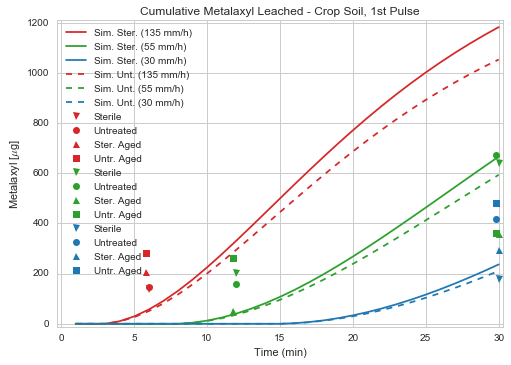

In [15]:
pestiplot_all(cum_leach_mx_crop, 
              leach1_high_6min, 
              leach1_med_12min, leach1_med_30min,
              leach1_low_30min,
              'Cumulative Metalaxyl Leached - Crop Soil, 1st Pulse',
              'Metalaxyl')

### Living simulation results

Best log Kd (sterile):  3.407669579406666 ( Num:  1 ) 
 Error:  0.239137049007
Best log Kd (untreat):  3.407669579406666 ( Num:  1 ) 
 Error:  0.604973284241


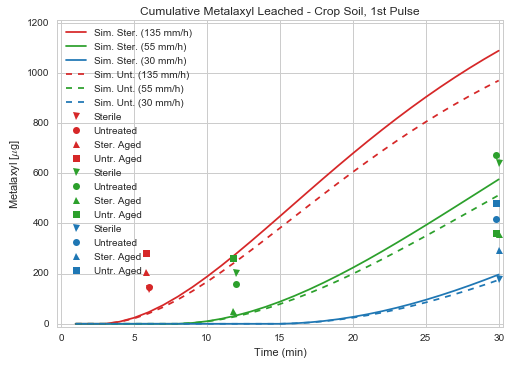

In [16]:
Kd_mexyl_living = [Kd_mexylC_crop_untreat]

# Any length unit input must be: "mm"
cum_mx_crop = pest_test(Kd_mexyl_living,
                        intensities,
                        pb_crop,
                        ovSat_crop,
                        percol_data1, runoff_data1, infil_data1, time_sizes1,
                        area, soil_height, 
                        mx_ini1,
                        mx_sol_leach1, mx_sol_pond1,
                        d, runoff_vel,
                        KFILM=True)

# Time axis
cum_time_30min = cum_mx_crop[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_crop[:, 1]
cum_mass_leach_st_55mmh = cum_mx_crop[:, 2]
cum_mass_leach_st_30mmh = cum_mx_crop[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_crop[:, 4]
cum_mass_leach_un_55mmh = cum_mx_crop[:, 5]
cum_mass_leach_un_30mmh = cum_mx_crop[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_crop[:, 7]
mass_leach_st_55mmh = cum_mx_crop[:, 8]
mass_leach_st_30mmh = cum_mx_crop[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_crop[:, 10]
mass_leach_un_55mmh = cum_mx_crop[:, 11]
mass_leach_un_30mmh = cum_mx_crop[:, 12]


# Group each compartment for graphing
cum_leach_mx_crop = stackdata6(cum_time_30min,
                               cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
                               cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

# NO RUN OFF OBSERVED

pestiplot_all(cum_leach_mx_crop, 
              leach1_high_6min, 
              leach1_med_12min, leach1_med_30min,
              leach1_low_30min,
              'Cumulative Metalaxyl Leached - Crop Soil, 1st Pulse',
              'Metalaxyl')

# Hydrology - 2nd pulse

In [17]:
''' Hydrological controlling parameters'''
ov_2 = ovSat_crop - 0.038  # Initial water content m3. m-3
psi_crop = 1100  # soil suction Alteck mm
psi_cropB = 617  # soil suction Alteck mm
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height2 = 20  # mm

**Observed Percolation - 2nd pulse**

In [18]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([14.192, 8.245, 2.410, 5.469]) 

# At 12 min, med intensity
leach_med_12min = np.array([18.672, 19.0, 0.830, 11.407]) 

# At 30min, med intensity
leach_med_30min = np.array([12.697, 2.473, 3.52, 20.291])  

# At 30min, low intensity
leach_low_30min = np.array([29.656, 9.375, 0.409, 3.385]) 

**Observed Ponding - 2nd pulse**

In [19]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([10.824, 20.935, 24.75, 19.041])  

# all at 12 min, med intensity
roff_med_12min = np.array([0, 3.907, 19.436, 7.313]) 

# all at 30min, med intensity
roff_med_30min = np.array([43.764, 28.911, 51.964, 33.478])  

# all at 30min, low intensity
roff_low_30min = np.array([0, 22.618, 28.598, 27.314])  

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [20]:
2.25/25

0.09

In [21]:
2.25/50

0.045

In [22]:
water2_ktest_fresh = leachsim2(
    leach_high_6min, leach_med_12min, leach_med_30min, leach_low_30min,
    kSat = [2.25/25, 2.25/50, 2.25/100, 2.25/125, 2.25/150, 2.25/175, 2.25/200, 2.25/250],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = False
)

0.0 5.093170329928398e-11 3.637978807091713e-11 -3.637978807091713e-12
ksat high:  0.045 ksat med12:  0.09 ksat med30:  0.009 ksat low:  0.045


In [23]:
water2_ktest_aged = leachsim2(
    leach_high_6min, leach_med_12min, leach_med_30min, leach_low_30min,
    kSat = [2.25/50, 2.25/100, 2.25/125, 2.25/150, 2.25/175, 2.25/200, 2.25/250, 2.25/700, 2.25/1000],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = True
)

2.9103830456733704e-11 5.093170329928398e-11 5.093170329928398e-11 7.275957614183426e-12
ksat high:  0.009 ksat med12:  0.01125 ksat med30:  0.01125 ksat low:  0.00225


### Percolation - 2nd pulse (fresh soil)

In [24]:
# Time axis
cum_time_30min = water2_ktest_fresh[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_fresh[:, 9]
cum_leach_55mmhA = water2_ktest_fresh[:, 10]
cum_leach_55mmhB = water2_ktest_fresh[:, 11]
cum_leach_30mmh = water2_ktest_fresh[:, 12]

# Group each compartment for graphing
percol_data2_fresh = stackdata4(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmhA, cum_leach_55mmhB, cum_leach_30mmh)

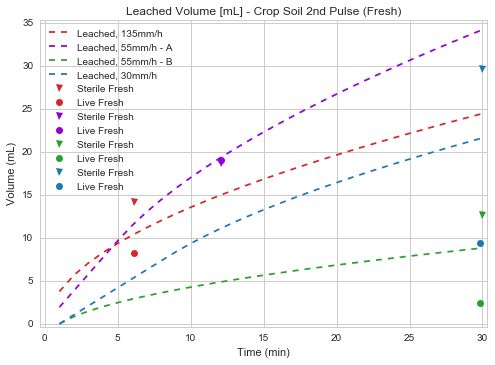

In [25]:
hydroplot2(percol_data2_fresh, 
          "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Crop Soil 2nd Pulse",
          AGED = False)

### Ponding - 2nd (fresh soil)

In [26]:
# Ponding fresh
roff_135mmh = water2_ktest_fresh[:, 13]
roff_55mmhA = water2_ktest_fresh[:, 14]
roff_55mmhB = water2_ktest_fresh[:, 15]
roff_30mmh = water2_ktest_fresh[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_fresh[:, 17]
cum_roff_55mmhA = water2_ktest_fresh[:, 18]
cum_roff_55mmhB = water2_ktest_fresh[:, 19]
cum_roff_30mmh = water2_ktest_fresh[:, 20]


runoff_data2_fresh = stackdata4(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmhA, cum_roff_55mmhB, cum_roff_30mmh)


time_size_135mmh = water2_ktest_fresh[:, 25]
time_size_55mmhA = water2_ktest_fresh[:, 26]
time_size_55mmhB = water2_ktest_fresh[:, 27]
time_size_30mmh = water2_ktest_fresh[:, 28]

time_sizes2 = [time_size_135mmh, time_size_55mmhA, time_size_55mmhB, time_size_30mmh]

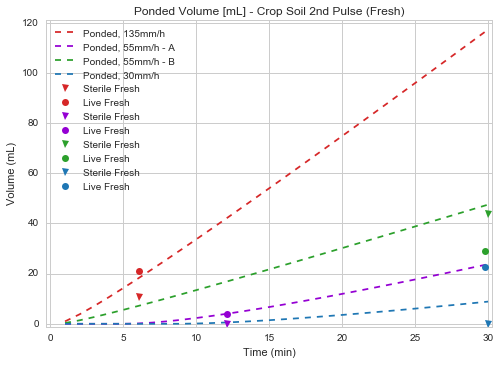

In [27]:
hydroplot2(runoff_data2_fresh, 
          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
          AGED = False)

### Percolation - 2nd pulse (aged soil)

In [28]:
# Time axis
cum_time_30min = water2_ktest_aged[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_aged[:, 9]
cum_leach_55mmhA = water2_ktest_aged[:, 10]
cum_leach_55mmhB = water2_ktest_aged[:, 11]
cum_leach_30mmh = water2_ktest_aged[:, 12]

# Group each compartment for graphing
percol_data2_aged = stackdata4(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmhA, cum_leach_55mmhB, cum_leach_30mmh)


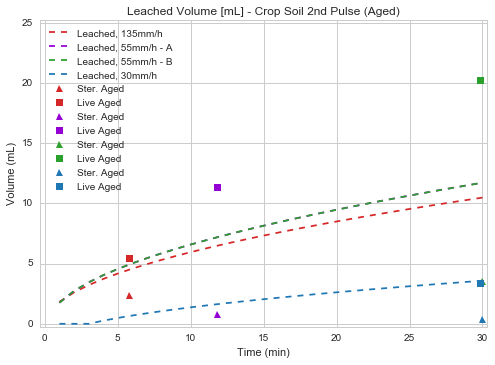

In [29]:
hydroplot2(percol_data2_aged, 
          "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
          leach_high_6min, leach_med_12min, leach_med_30min, leach_low_30min,
         "Leached Volume [mL] - Crop Soil 2nd Pulse",
          AGED = True)

### Ponding - 2nd pulse (aged soil)

In [30]:
# Ponding Aged
roff_135mmh = water2_ktest_aged[:, 13]
roff_55mmhA = water2_ktest_aged[:, 14]
roff_55mmhB = water2_ktest_aged[:, 15]
roff_30mmh = water2_ktest_aged[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_aged[:, 17]
cum_roff_55mmhA = water2_ktest_aged[:, 18]
cum_roff_55mmhB = water2_ktest_aged[:, 19]
cum_roff_30mmh = water2_ktest_aged[:, 20]


runoff_data2_aged = stackdata4(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmhA, cum_roff_55mmhB, cum_roff_30mmh)


time_size_135mmh = water2_ktest_aged[:, 25]
time_size_55mmhA = water2_ktest_aged[:, 26]
time_size_55mmhB = water2_ktest_aged[:, 27]
time_size_30mmh = water2_ktest_aged[:, 28]

time_sizes2 = [time_size_135mmh, time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhA, 
               time_size_55mmhB, time_size_55mmhB, 
               time_size_30mmh, time_size_30mmh]

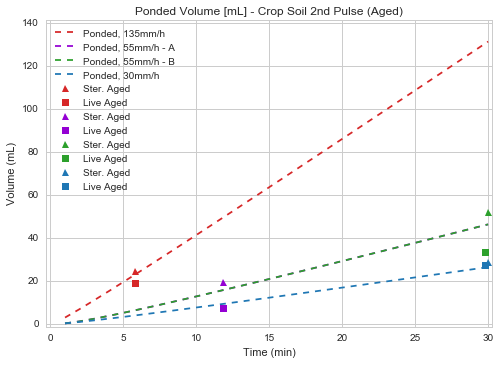

In [31]:
hydroplot2(runoff_data2_aged, 
          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
          AGED = True)

## Transport - 2nd pulse

** Initial and observed mass in leachate and ponding **

In [32]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs, percolated_vol, roff_vol)
mx_dict_S = {
    'high_0d': (1496.75, 8.35, 5.7),
    'high_1d': (1127.52, 37.57, 4.1),
    'med12_0d': (1440.72, 290.3, 'nan'),
    'med12_1d': (1267.11, 'nan', 9.2),
    'med30_0d': (1047.95, 93.3, 4.3),
    'med30_1d': (994.09, 82.2, 14.0),
    'low_0d': (1462.08, 285.3, 'nan'),
    'low_1d': (1050.48, 'nan', 12.4)
}

#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)
mx_dict_L = {
    'high_0d': (1222.86, 175.44, 4.7),
    'high_1d': (1006.54, 40.03, 3.2),
    'med12_0d': (1211.28, 272.5, 1.8),
    'med12_1d': (1025.43, 168.5, 'nan'),
    'med30_0d': (751.13, 35.1, 8.9),
    'med30_1d': (938.23, 146.1, 0.1),
    'low_0d': (979.82, 86.0, 5.8),
    'low_1d': (830.68, 76.5, 9.6)
}

### Computation mass transfer - Metalaxyl, Crop, 2nd Pulse

In [33]:
"""
mx_sterile_2nd = pest_test3(
    Kd_mexyl,
    mx_dict_S,
    pb_crop,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)
"""

'\nmx_sterile_2nd = pest_test3(\n    Kd_mexyl,\n    mx_dict_S,\n    pb_crop,\n    ovSat_crop,\n    percol_data2_fresh, runoff_data2_fresh,\n    percol_data2_aged, runoff_data2_aged, \n    time_sizes2,\n    area, soil_height2,\n    d, runoff_vel)\n'

#### Kd Choice:

In [34]:
mx_sterile_2nd = pest_test3(
    Kd_mexyl_sterile,
    mx_dict_S,
    pb_crop,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)

Best log Kd:  3.3511389585818487 ( Num:  1 ) 
 Error:  217.464394217


In [35]:
"""
mx_living_2nd = pest_test3(
    Kd_mexyl,
    mx_dict_L,
    pb_crop,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)
"""

'\nmx_living_2nd = pest_test3(\n    Kd_mexyl,\n    mx_dict_L,\n    pb_crop,\n    ovSat_crop,\n    percol_data2_fresh, runoff_data2_fresh,\n    percol_data2_aged, runoff_data2_aged, \n    time_sizes2,\n    area, soil_height2,\n    d, runoff_vel)\n'

In [45]:
mx_living_2nd = pest_test3(
    Kd_mexyl_living,
    mx_dict_L,
    pb_crop,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)


Best log Kd:  3.407669579406666 ( Num:  1 ) 
 Error:  177.553752478


## Plotting transport 

### Sterile

In [46]:
# Time axis
cum_time_30min = mx_sterile_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = mx_sterile_2nd[:, 1]
high_1d_cum_mass_out_dt = mx_sterile_2nd[:, 2]

med12_0d_cum_mass_out_dt = mx_sterile_2nd[:, 3]
med12_1d_cum_mass_out_dt = mx_sterile_2nd[:, 4]

med30_0d_cum_mass_out_dt = mx_sterile_2nd[:, 5]
med30_1d_cum_mass_out_dt = mx_sterile_2nd[:, 6]

low_0d_cum_mass_out_dt = mx_sterile_2nd[:, 7]
low_1d_cum_mass_out_dt = mx_sterile_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = mx_sterile_2nd[:, 9]
high_1d_overmass_dt = mx_sterile_2nd[:, 10]
med12_0d_overmass_dt = mx_sterile_2nd[:, 11]
med12_1d_overmass_dt = mx_sterile_2nd[:, 12]

med30_0d_overmass_dt = mx_sterile_2nd[:, 13]
med30_1d_overmass_dt = mx_sterile_2nd[:, 14]
low_0d_overmass_dt = mx_sterile_2nd[:, 15]
low_1d_overmass_dt = mx_sterile_2nd[:, 16]

mass_percol_sterile2 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile2 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

### Living

In [47]:

# Time axis
cum_time_30min = mx_living_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = mx_living_2nd[:, 1]
high_1d_cum_mass_out_dt = mx_living_2nd[:, 2]

med12_0d_cum_mass_out_dt = mx_living_2nd[:, 3]
med12_1d_cum_mass_out_dt = mx_living_2nd[:, 4]

med30_0d_cum_mass_out_dt = mx_living_2nd[:, 5]
med30_1d_cum_mass_out_dt = mx_living_2nd[:, 6]

low_0d_cum_mass_out_dt = mx_living_2nd[:, 7]
low_1d_cum_mass_out_dt = mx_living_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = mx_living_2nd[:, 9]
high_1d_overmass_dt = mx_living_2nd[:, 10]
med12_0d_overmass_dt = mx_living_2nd[:, 11]
med12_1d_overmass_dt = mx_living_2nd[:, 12]

med30_0d_overmass_dt = mx_living_2nd[:, 13]
med30_1d_overmass_dt = mx_living_2nd[:, 14]
low_0d_overmass_dt = mx_living_2nd[:, 15]
low_1d_overmass_dt = mx_living_2nd[:, 16]

mass_percol_living2 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt,
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt,
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living2 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

### Sterile Plots - Metalaxyl (2nd Pulse, Crop Soil)

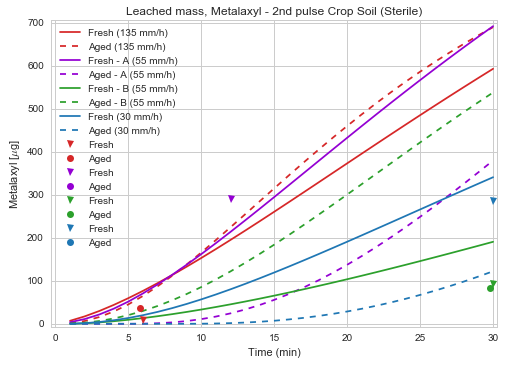

In [48]:
pestiplot_condition(
    mass_percol_sterile2,
    mx_dict_S,
    'Metalaxyl',
    soil_type='Crop Soil',
    LEACH = True,
    STERILE = True
)

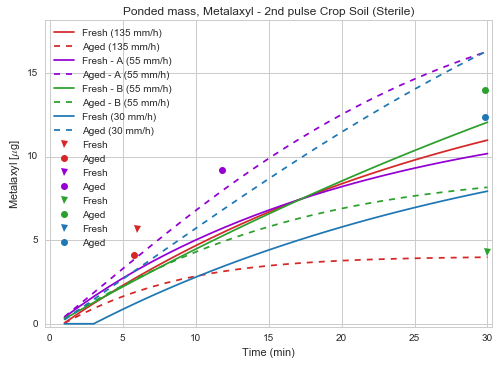

In [49]:
pestiplot_condition(
    mass_pond_sterile2,
    mx_dict_S,
    'Metalaxyl',
    soil_type='Crop Soil',
    LEACH = False,
    STERILE = True
)

### Living Plots - Metalaxyl (2nd Pulse, Crop Soil)

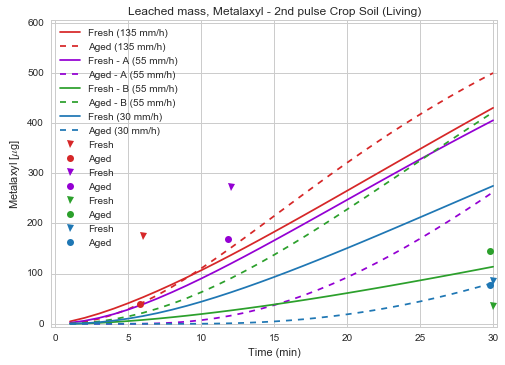

In [50]:
pestiplot_condition(
    mass_percol_living2,
    mx_dict_L,
    'Metalaxyl',
    soil_type='Crop Soil',
    LEACH = True,
    STERILE = False
)

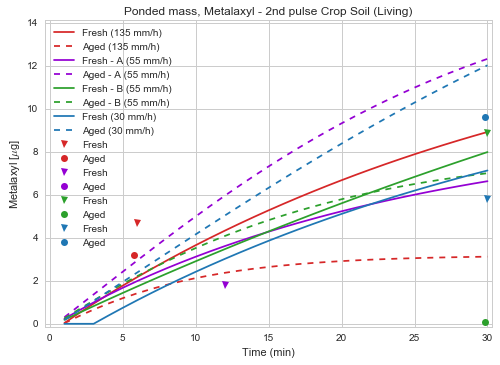

In [51]:
pestiplot_condition(
    mass_pond_living2,
    mx_dict_L,
    'Metalaxyl',
    soil_type='Crop Soil',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK